# Lecture 23 - The Perceptron Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')
from IPython.display import Image

# The Perceptron Algorithm

Consider an alternative error function known as the *perceptron criterion*. To derive this, we note that we are seeking a weight vector $\mathbf{w}$ such that patterns $x_i$ in class $C_1$ will have $\mathbf{w}^Tx_i + b > 0$, whereas the patterns $x_i$ in class $C_2$ have $\mathbf{w}^Tx_i + b < 0$. Using the $t\in \{-1,1\}$ target coding scheme it follows that we would like all patterns to satisfy

$$(\mathbf{w}^Tx_i + b)t_i > 0$$

* The perceptron criterion associates zero error with any pattern that is correctly classified, whereas for a misclassified pattern $x_i$ it tries to minimize the quantity $-(\mathbf{w}^Tx_i + b)t_i$.

* The perceptron criterion is therefore given by:

$$E_p(\mathbf{w},b) = - \sum_{n\in\mathcal{M}} (\mathbf{w}^T \mathbf{x}_n + b) t_n$$

where $\mathcal{M}$ denotes the set of all misclassified patterns.

* We now apply the *stochastic gradient descent* algorithm to this error function. The change in the weight vector $\mathbf{w}$ is then given by:

\begin{eqnarray}
\mathbf{w}^{(t+1)} &\leftarrow & \mathbf{w}^{(t)} - \eta \frac{\partial E_p(\mathbf{w},b)}{\partial \mathbf{w}} = \mathbf{w}^{(t)} + \eta \mathbf{x}_n t_n\\
b^{(t+1)} &\leftarrow & b^{(t)} - \eta\frac{\partial E_p(\mathbf{w},b)}{\partial b} = b^{(t)} + \eta t_n
\end{eqnarray}

where $\eta$ is the **learning rate** parameter and $t$ is an integer that indexes the iteration steps of the algorithm. 

* Note that, as the weight vector evolves during training, the set of patterns that are misclassified will change.

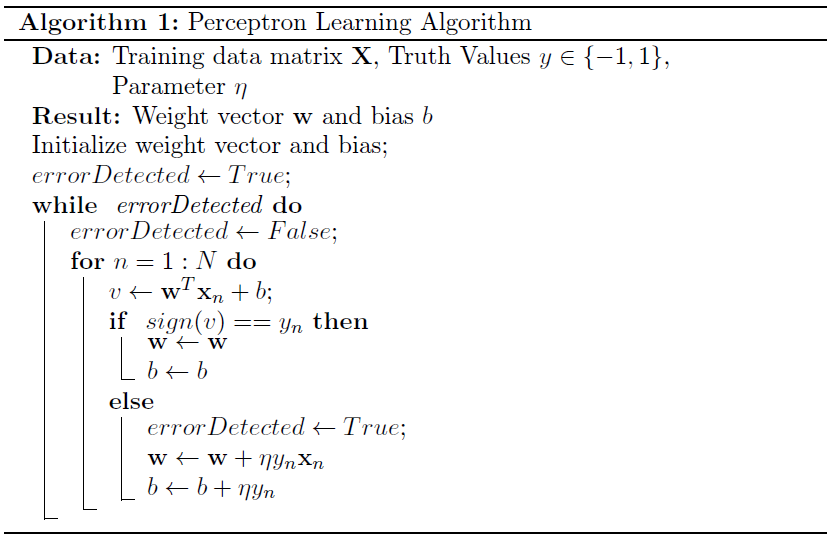

In [2]:
Image('figures/PerceptronLearning.png', width=700)

In [2]:
def generateMVNRandData(Npts, mu, sigma):
    data  = np.random.multivariate_normal(mu, sigma*np.eye(len(mu)), Npts)
    return data

def plotLine(weights, range):
    x = np.array(range)
    y = -(weights[0]/weights[1])-(weights[2]/weights[1])*x
    plt.plot(y,x)

def perceptronLearningAlg(data,labels,eta,nEpochs):
    nPts = data.shape[0]
    weights = np.random.rand(data.shape[1])
    print('Initial weights:', weights)
    
    error = 1
    epo = 0
    while(error > 0 and epo < nEpochs):
        error = 0
        epo += 1
        for i in range(nPts):
            activation =  data[i,:]@weights
            if np.sign(activation) != labels[i]: #misclassified sample
                weights += eta*data[i,:]*labels[i]
                error += 1
                plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)
                plotLine(weights, [-2,2]);
                plt.pause(0.5)
    
    print('Final weights:', weights)
    return weights

Initial weights: [0.32428719 0.97093762 0.23017878]


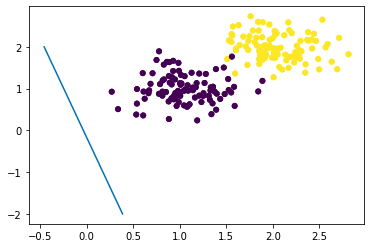

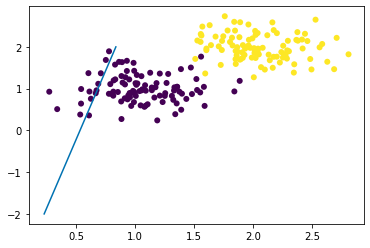

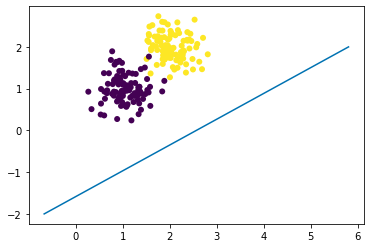

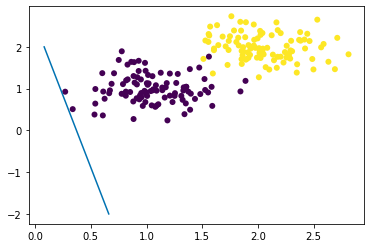

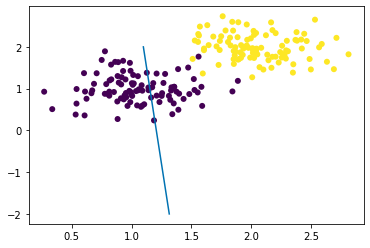

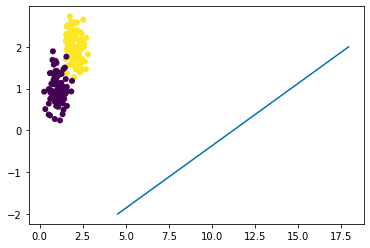

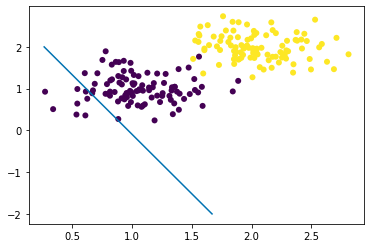

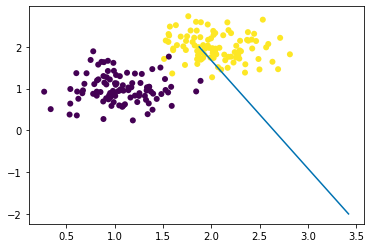

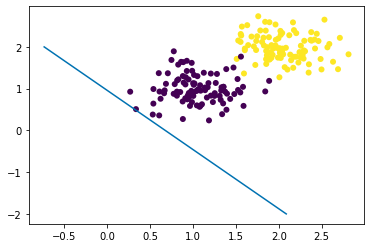

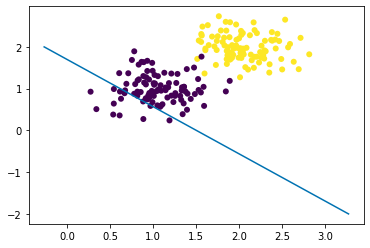

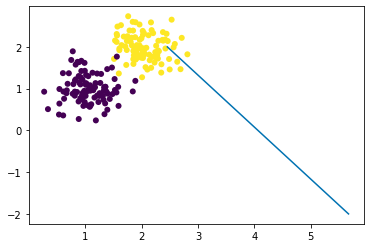

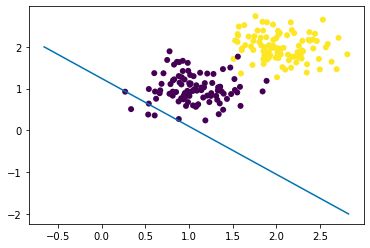

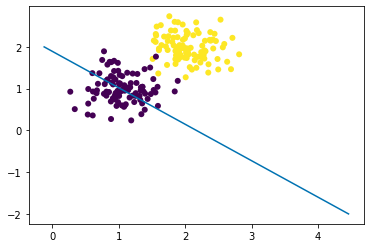

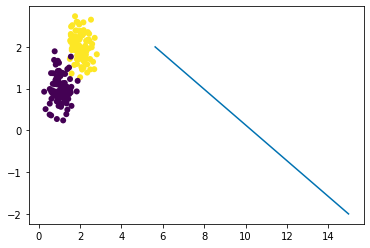

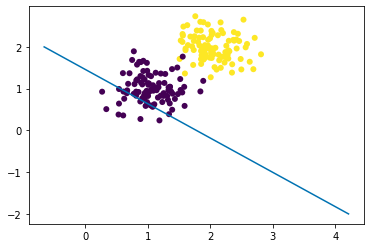

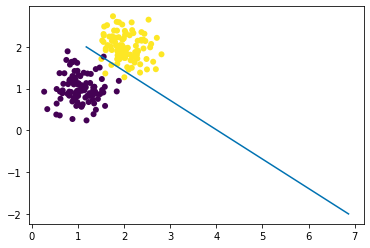

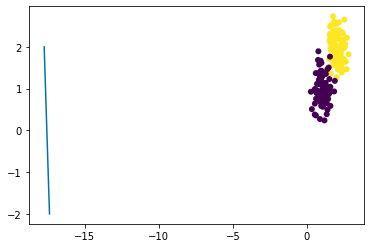

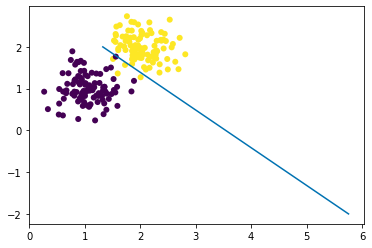

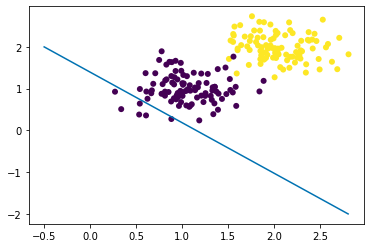

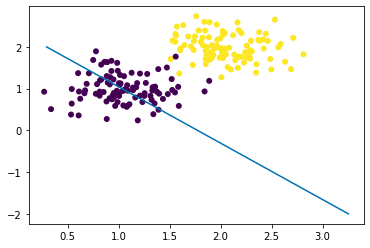

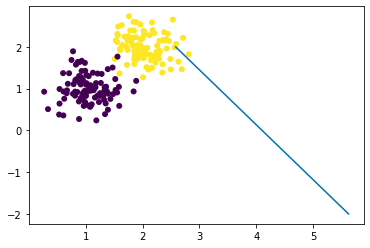

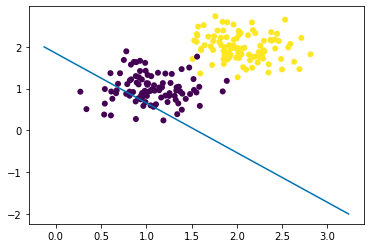

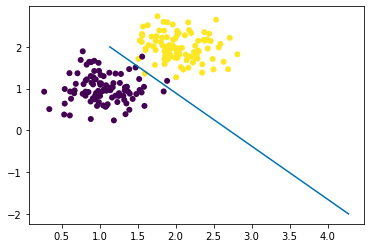

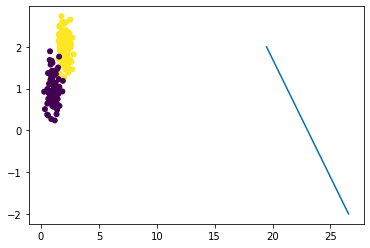

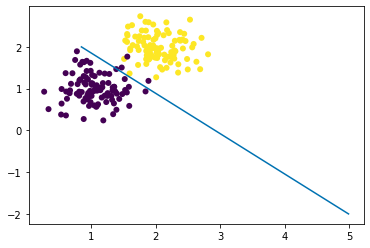

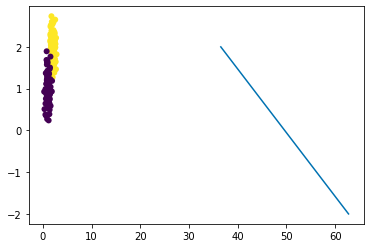

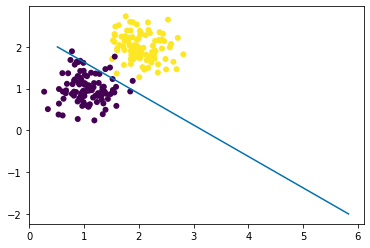

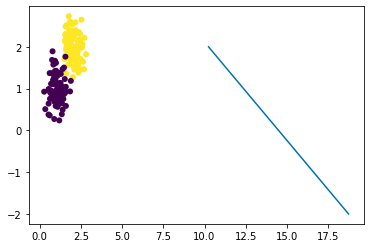

Final weights: [-2.07571281  0.14325157  0.30408162]


In [5]:
Npts  = 100
mu1   = [2,2]
mu2   = [1,1]
var   = .1
eta   = 0.3
nEpochs = 10;

data1 = np.array(generateMVNRandData(Npts, mu1, var))
data1 = np.hstack((np.ones((Npts,1)),data1))

data2 = np.array(generateMVNRandData(Npts, mu2, var))
data2 = np.hstack((np.ones((Npts,1)),data2))

data  = np.vstack(( data1, data2))
labels= np.hstack((np.ones(Npts), -np.ones(Npts)))

plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)

perceptronLearningAlg(data,labels,eta,nEpochs);

# Perceptron Convergence Theorem

The *Perceptron convergence theorem* states that for any data set which is linearly separable the perceptron learning algorithm is guaranteed to find a solution in a finite number of steps.

* In other words, the Perceptron learning rule is guaranteed to converge to a weight vector that correctly classifies the examples provided the training examples are linearly separable.

# Food for Thought

Questions to consider:

1. Consider a neuron with two inputs and one output and a step function. If two weights are $w_1=1$ and $w_2 =1$, and the bias is $b=-1.5$, then what is the output for inputs $(0,0)$, $(1,0)$, $(0,1)$, and $(1,1)$?

2. How does the learning behavior change with changes in $\eta$? as $\eta$ increases? as $\eta$ decreases?

3. How would you generate overlapping classes using the provided code? Explain your answer. (Only change parameters. You do not need to change code.)

4. What happens to the learning behavior when you have overlapping classes?

5. The implementation provided uses $\{-1,1\}$ labels. Suppose we want to use labels $\{0,1\}$. How can we formulate the Perceptron Learning? How does the code need to change to account for this difference (i.e., suppose you want to use $\{0,1\}$ labels. What would you need to change in the code?) Why?

6. In the provided code, there is not a separate line for learning the bias $b$ as in the pseudo-code above. How is it being estimated and represented it in the code? (... the code *is* still learning the bias value).

# Kernel Machine

C:\Users\catia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


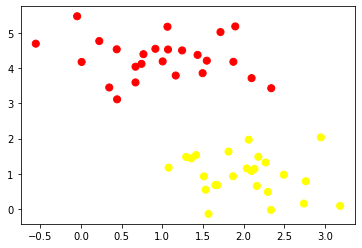

In [6]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

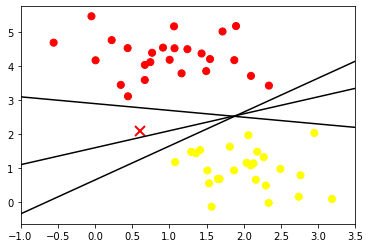

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

## Support Vector Machines: Maximizing the Margin

SVMs offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

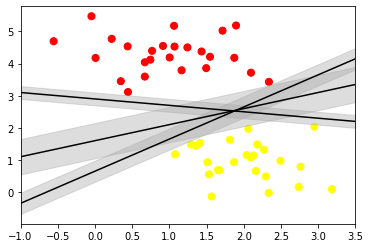

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.